In [1]:
import sys
from time import time
import warnings
import pandas as pd
from data_structure.dataset import Dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import auc
import seaborn as sns
from matplotlib import pyplot as plt
from utils.Utilities import *
warnings.filterwarnings('ignore')

In [2]:
import os
if os.path.isfile('data/ai4fit_data_anonym.csv'):
    ai4fit_data = pd.read_csv('data/ai4fit_data_anonym.csv')

In [3]:
ai4fit_data

,w_id,user_id,trainer_id,o_distance,o_time,o_pace,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,...,workout_date,mean_rating,rating,month,weekday,weeknumber,year,days_from_previous,user_pop,dec_user_pop
0,141355,d4c074c60c57087c95fd0a17f986210c,c4616f5a24a66668f11ca4fa80525dc4,2000,1200,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-05-11 12:22:16,5.00,5,5,4,19,2018,0,0,0.00
1,141357,5bca8566db79f3788be9efd96c9ed70d,c81e728d9d4c2f636f067f89cc14862c,6000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-05-11 14:58:12,4.00,4,5,4,19,2018,0,0,0.00
2,141412,9910489e4ff310896dce21303a8e7fda,0b0b0994d12ad343511adfbfc364256e,8400,1800,0.000000,-0.073392,0.003561,0.000013,-0.093333,...,2018-05-11 22:22:41,4.00,4,5,4,19,2018,0,0,0.00
3,141408,db4db5ec58a9433419cb104eeab915c2,c81e728d9d4c2f636f067f89cc14862c,5550,2025,336.428571,-0.095826,0.005754,0.000033,0.124786,...,2018-05-12 06:10:13,4.00,4,5,5,19,2018,0,0,0.00
4,141432,d1f255a373a3cef72e03aa9d980c7eca,4e732ced3463d06de0ca9a15b6153677,13000,5340,117.500000,0.000000,0.000000,0.000000,1.059476,...,2018-05-12 06:39:48,5.00,5,5,5,19,2018,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,165323,647c722bf90a49140184672e0d3723e3,72b32a1f754ba1c09b3695e0cb6cde7f,16000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018-11-16 20:19:32,4.00,4,11,4,46,2018,2,41,39.75
5819,165371,d1f255a373a3cef72e03aa9d980c7eca,4e732ced3463d06de0ca9a15b6153677,10000,4665,167.727273,0.000000,0.000000,0.000000,0.856130,...,2018-11-17 09:13:48,4.50,5,11,5,46,2018,14,159,157.75
5820,164905,fc1618c9ae39989770371191790a772b,e71ad22eed10d8f6f8242f67695b215f,9200,2920,295.000000,0.000000,0.000000,0.000000,-0.244945,...,2018-11-17 10:42:06,4.25,4,11,5,46,2018,7,4,2.75
5821,165359,848474d80d20998fc6dc0106da7d8bcb,c81e728d9d4c2f636f067f89cc14862c,9000,3010,140.000000,0.482821,0.139750,0.019530,0.410278,...,2018-11-17 14:57:40,5.00,5,11,5,46,2018,14,9,7.75


In [4]:
def normalize(x):
    return(x-min(x))/(max(x)-min(x))

In [5]:
ai4fit_data['base_rank']= normalize(ai4fit_data.mean_rating-ai4fit_data.rating)

In [6]:
test_set = pd.DataFrame(columns=ai4fit_data.columns)
i = 0
for u_id in ai4fit_data.user_id.unique():
    row = ai4fit_data[ai4fit_data.user_id==u_id].sort_values(by=['w_id'],ascending=False).iloc[0]
    test_set.loc[i] = row
    i=i+1
print("In total: ", test_set.shape)
test_set.head(5).append(test_set.tail(5))

In total:  (291, 42)


,w_id,user_id,trainer_id,o_distance,o_time,o_pace,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,...,mean_rating,rating,month,weekday,weeknumber,year,days_from_previous,user_pop,dec_user_pop,base_rank
0,142125,d4c074c60c57087c95fd0a17f986210c,c4616f5a24a66668f11ca4fa80525dc4,8000,3820,64.000000,0.437333,0.174933,3.060167e-02,1.329609,...,2.75,2,7,0,29,2018,0,4,2.75,0.875
1,142026,5bca8566db79f3788be9efd96c9ed70d,c81e728d9d4c2f636f067f89cc14862c,6000,1980,165.000000,0.000000,0.000000,0.000000e+00,-0.016396,...,4.75,5,5,1,20,2018,4,1,0.00,0.375
2,145382,9910489e4ff310896dce21303a8e7fda,0b0b0994d12ad343511adfbfc364256e,10000,0,0.000000,-0.000053,0.000026,7.021383e-10,0.000000,...,5.00,5,7,0,29,2018,0,13,11.75,0.500
3,156978,db4db5ec58a9433419cb104eeab915c2,c81e728d9d4c2f636f067f89cc14862c,5000,1700,170.000000,-0.000422,0.000211,4.450504e-08,0.055294,...,4.25,5,9,5,35,2018,24,30,28.75,0.125
4,165371,d1f255a373a3cef72e03aa9d980c7eca,4e732ced3463d06de0ca9a15b6153677,10000,4665,167.727273,0.000000,0.000000,0.000000e+00,0.856130,...,4.50,5,11,5,46,2018,14,159,157.75,0.250
286,161096,acf7e77a5936a316105ce94cee522f5d,ade1d98c5ab2997e867b1151a5c5028d,10000,0,0.000000,-0.000160,0.000080,6.428629e-09,0.000000,...,3.00,3,10,2,41,2018,6,5,3.75,0.500
287,165016,aaa80e84ff3e484a3983d1678cec094f,e71ad22eed10d8f6f8242f67695b215f,10000,0,0.000000,-0.000169,0.000084,7.124571e-09,0.000000,...,3.00,3,11,2,46,2018,7,5,3.75,0.500
288,165087,7af1e47458962fa10f52faeef3319119,ade1d98c5ab2997e867b1151a5c5028d,12000,0,0.000000,0.303466,0.151733,2.302298e-02,0.000000,...,3.00,3,11,2,46,2018,11,3,1.75,0.500
289,164905,fc1618c9ae39989770371191790a772b,e71ad22eed10d8f6f8242f67695b215f,9200,2920,295.000000,0.000000,0.000000,0.000000e+00,-0.244945,...,4.25,4,11,5,46,2018,7,4,2.75,0.625
290,164316,2562b3fcf3a15d7926bde2ff91919d3d,ade1d98c5ab2997e867b1151a5c5028d,4800,1740,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,3.75,4,11,3,45,2018,0,0,0.00,0.375


In [7]:
training_set = ai4fit_data.loc[~ai4fit_data['w_id'].isin(test_set.w_id.values)]
print("In total: ", training_set.shape)
training_set.head(5).append(training_set.tail(5))

In total:  (5532, 42)


,w_id,user_id,trainer_id,o_distance,o_time,o_pace,d_distance_sum,d_distance_std,d_distance_var,d_time_sum,...,mean_rating,rating,month,weekday,weeknumber,year,days_from_previous,user_pop,dec_user_pop,base_rank
0,141355,d4c074c60c57087c95fd0a17f986210c,c4616f5a24a66668f11ca4fa80525dc4,2000,1200,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,5.00,5,5,4,19,2018,0,0,0.00,0.500
1,141357,5bca8566db79f3788be9efd96c9ed70d,c81e728d9d4c2f636f067f89cc14862c,6000,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,4.00,4,5,4,19,2018,0,0,0.00,0.500
2,141412,9910489e4ff310896dce21303a8e7fda,0b0b0994d12ad343511adfbfc364256e,8400,1800,0.000000,-0.073392,0.003561,1.268350e-05,-0.093333,...,4.00,4,5,4,19,2018,0,0,0.00,0.500
3,141408,db4db5ec58a9433419cb104eeab915c2,c81e728d9d4c2f636f067f89cc14862c,5550,2025,336.428571,-0.095826,0.005754,3.310457e-05,0.124786,...,4.00,4,5,5,19,2018,0,0,0.00,0.500
4,141432,d1f255a373a3cef72e03aa9d980c7eca,4e732ced3463d06de0ca9a15b6153677,13000,5340,117.500000,0.000000,0.000000,0.000000e+00,1.059476,...,5.00,5,5,5,19,2018,0,0,0.00,0.500
5804,164449,2151b4c76b4dcb048d06a5c32942b6f6,e71ad22eed10d8f6f8242f67695b215f,4800,2664,37.058824,0.004113,0.003608,1.301646e-05,0.726587,...,3.00,3,11,4,45,2018,3,21,19.75,0.500
5805,164483,fc1618c9ae39989770371191790a772b,e71ad22eed10d8f6f8242f67695b215f,18000,5940,165.000000,0.000000,0.000000,0.000000e+00,-0.011873,...,5.00,5,11,5,45,2018,3,3,1.75,0.500
5806,164758,2151b4c76b4dcb048d06a5c32942b6f6,e71ad22eed10d8f6f8242f67695b215f,4500,2331,84.375000,-0.006348,0.001395,1.947032e-06,-0.837792,...,2.25,2,11,0,46,2018,3,22,20.75,0.625
5807,164851,117cdc17fa822afc77008dd9ba74b6af,e71ad22eed10d8f6f8242f67695b215f,5000,2100,210.000000,-0.001149,0.000575,3.302977e-07,0.063810,...,5.00,5,11,1,46,2018,24,13,11.75,0.500
5809,165099,647c722bf90a49140184672e0d3723e3,72b32a1f754ba1c09b3695e0cb6cde7f,10000,575,143.750000,0.000000,0.000000,0.000000e+00,-0.185375,...,3.75,4,11,2,46,2018,18,40,38.75,0.375


In [8]:
columns = ['o_distance', 'p_unknown', 'p_walking', 'p_running', 'r_time',
               'r_speed', 'r_distance', 'r_pace', 'o_pace', 'o_time',
               'p_welldone', 'weight_situation', 'age', 'height', 'weight',
               'gender', 'bmi', 'calories', 'p_has_objective', 
           'd_distance_sum', 'd_distance_std', 'd_distance_var', 'd_time_sum',
       'd_time_std', 'd_time_var', 'd_pace_mean', 'd_pace_std', 'd_pace_var','mean_rating']
X_train = training_set[columns]
y_train = training_set[['rating']]

X_test = training_set[columns]
y_test = training_set[['rating']]

X_train, X_test, y_train, y_test = train_test_split(ai4fit_data[columns], ai4fit_data[['rating']], test_size=0.2, random_state=0)





In [9]:
columns = ['o_distance', 'p_unknown', 'p_walking', 'p_running', 'r_time',
                'r_distance', 'r_pace', 'o_pace', 'o_time',
               'p_welldone', 'weight_situation', 'age', 'height', 'weight',
               'gender', 'bmi', 'calories', 'p_has_objective', 
           'd_distance_sum', 'd_distance_std', 'd_distance_var', 'd_time_sum',
       'd_time_std', 'd_time_var', 'd_pace_mean', 'd_pace_std', 'd_pace_var','mean_rating']
importances = [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6.,
               8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 9., 10., 10., 10.,
               10., 10.,10., 10., 10.,
               10.
              ]



<AxesSubplot:>

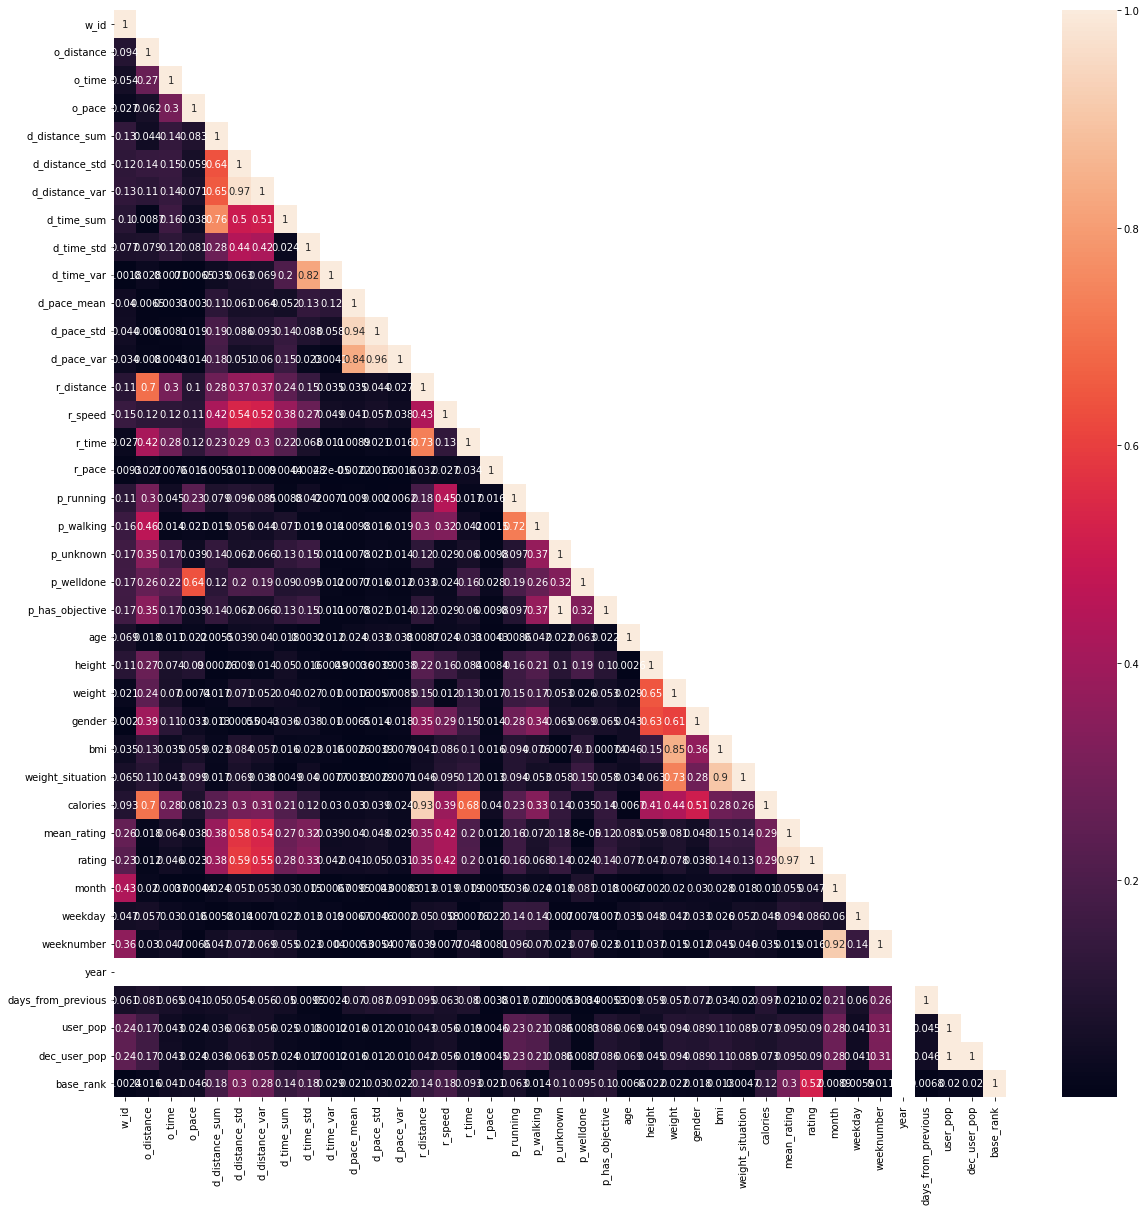

In [10]:
plt.figure(figsize=(20,20))
# Create correlation matrix
corr_matrix = training_set.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))


sns.heatmap(upper, annot=True)

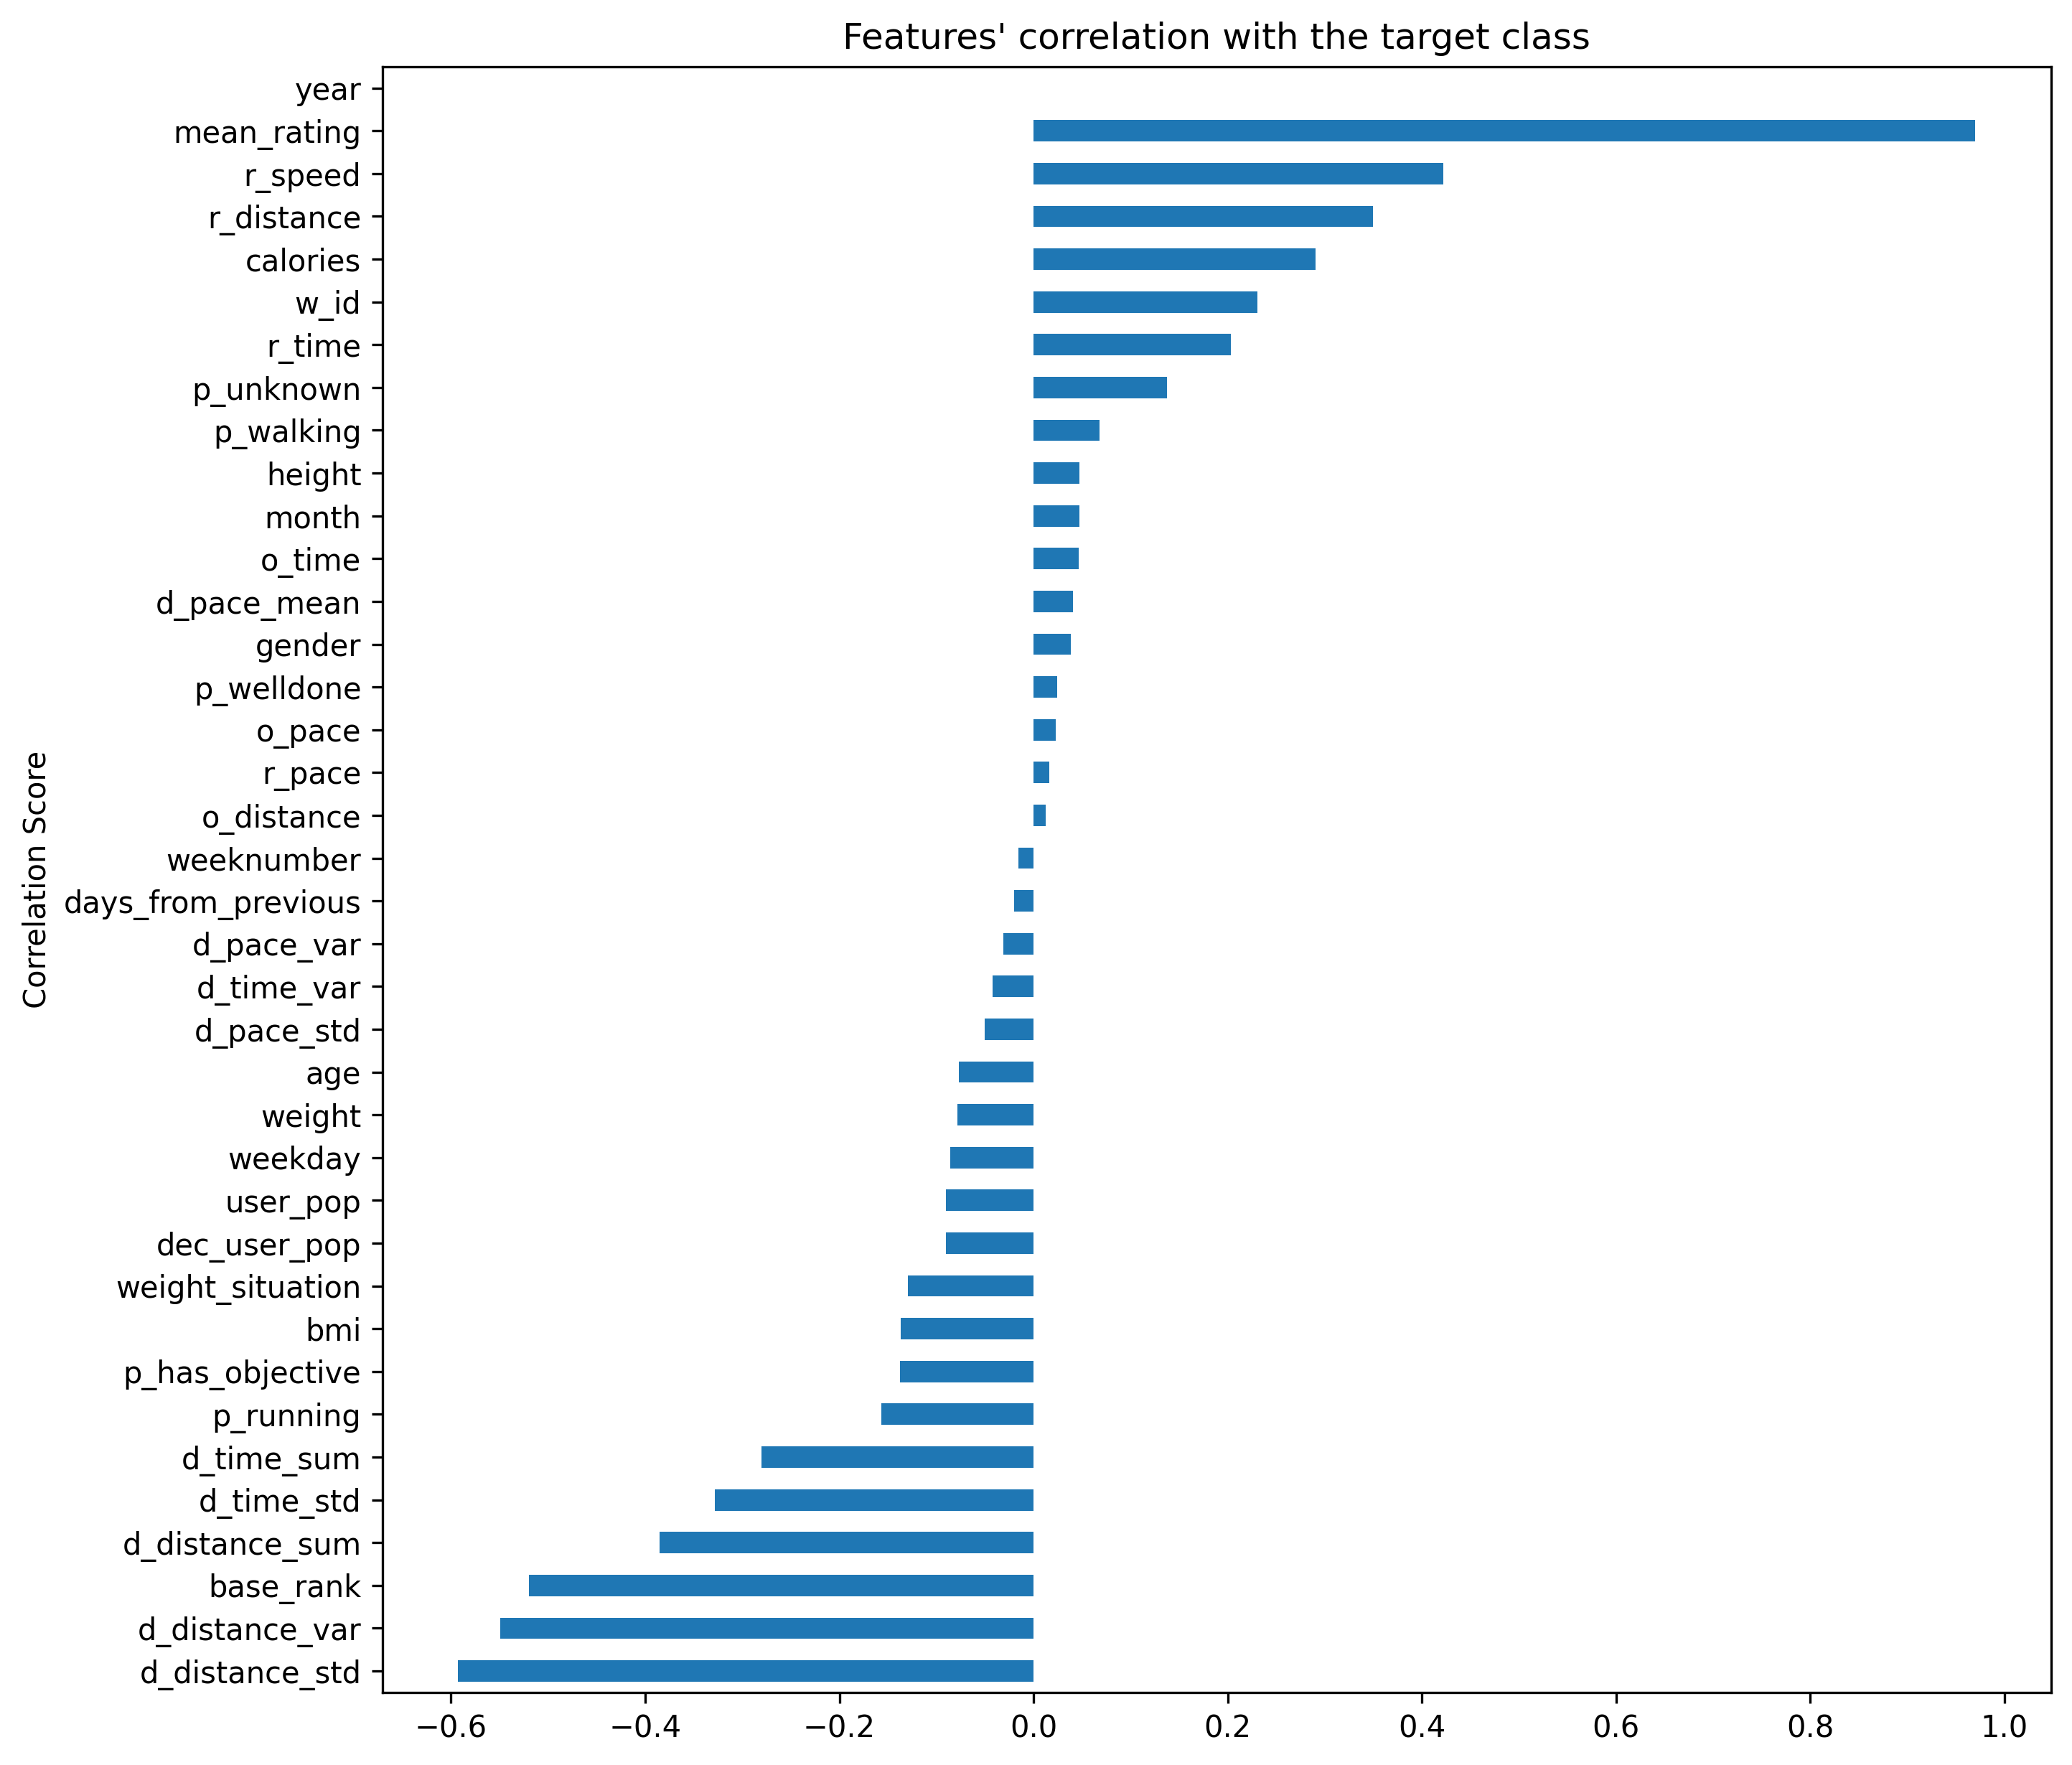

In [11]:
plt.figure(figsize=(10,10),dpi=300)
training_set[training_set.columns].corr().drop('rating')['rating'].sort_values().plot.barh()
plt.title('Features\' correlation with the target class')
plt.ylabel("Correlation Score")
plt.show()

In [12]:
columns_importances = {'column':columns,'importance':importances}
pd.DataFrame(columns_importances)

,column,importance
0,o_distance,5.0
1,p_unknown,5.0
2,p_walking,5.0
3,p_running,5.0
4,r_time,5.0
5,r_distance,5.0
6,r_pace,5.0
7,o_pace,5.0
8,o_time,5.0
9,p_welldone,5.0


In [13]:
from sklearn import tree
from sklearn import linear_model
import operator


In [14]:
time_start = datetime.now()



importances_ = importances.copy()#ensemble.GradientBoostingClassifier(),
classifiers = [ensemble.GradientBoostingClassifier(),ensemble.ExtraTreesClassifier(),ensemble.RandomForestClassifier(),tree.DecisionTreeClassifier()]
models = []
features = []

for classifier in classifiers:
    features_, models_ = remove_features_one_by_one(classifier, columns, X_train, y_train,)
    models = models + models_
    features = features + features_
    
results = print_results(models, features, X_test, y_test, 'data/results_removing_columns_'+str(datetime.now().strftime("%d-%m-%Y_%H:%M:%S"))+'.csv')
time_end = datetime.now()
diff = time_end - time_start
divmod(diff.days * 86400 + diff.seconds, 60)

 
GradientBoostingClassifier
 - Removing Features One By One and Training 
GradientBoostingClassifier - Elapsed time: 0:8:51.90 
ExtraTreesClassifier
 - Removing Features One By One and Training 
ExtraTreesClassifier - Elapsed time: 0:0:30.378 
RandomForestClassifier
 - Removing Features One By One and Training 
RandomForestClassifier - Elapsed time: 0:0:53.837 
DecisionTreeClassifier
 - Removing Features One By One and Training 
DecisionTreeClassifier - Elapsed time: 0:0:8.750
 - Printing Results
 - Results are stored in: data/results_removing_columns_25-05-2022_17:54:00.csv=====================================> 100%


(10, 30)

In [15]:
#results.columns = ['Algorithm', 'Accuracy', 'F1-Score', 'F2-Score', 'Recall', 'Precision', 'Informedness', 'RMSE', 'removed_item']

In [16]:
results.iloc[0]

0       Algorithm
1        Accuracy
2        F1-Score
3        F2-Score
4          Recall
5       Precision
6    Informedness
7            RMSE
8    removed_item
Name: 0, dtype: object

In [17]:
results.columns = results.iloc[0]
results = results.reindex(results.index.drop(0))


In [18]:
results.sort_values(by=['Informedness','Accuracy'],ascending=False).head(50)

,Algorithm,Accuracy,F1-Score,F2-Score,Recall,Precision,Informedness,RMSE,removed_item
75,RandomForestClassifier,0.955,0.953,0.953,0.952,0.954,0.94,0.219,"[r_speed, height]"
70,RandomForestClassifier,0.951,0.946,0.948,0.95,0.943,0.937,0.236,"[r_speed, p_has_objective]"
69,RandomForestClassifier,0.946,0.947,0.948,0.949,0.945,0.935,0.233,"[r_speed, d_distance_sum]"
78,RandomForestClassifier,0.949,0.944,0.946,0.947,0.942,0.934,0.254,"[r_speed, p_welldone]"
66,RandomForestClassifier,0.948,0.945,0.947,0.947,0.943,0.934,0.247,"[r_speed, d_time_sum]"
21,GradientBoostingClassifier,0.949,0.947,0.947,0.946,0.949,0.933,0.225,"[r_speed, o_time]"
73,RandomForestClassifier,0.947,0.944,0.945,0.946,0.942,0.932,0.242,"[r_speed, gender]"
86,RandomForestClassifier,0.947,0.943,0.945,0.946,0.94,0.932,0.264,"[p_unknown, r_speed]"
80,RandomForestClassifier,0.947,0.944,0.944,0.945,0.943,0.931,0.231,"[r_speed, o_pace]"
84,RandomForestClassifier,0.946,0.94,0.943,0.945,0.936,0.931,0.27,"[p_running, r_speed]"


In [19]:
removed_items = []
for x in results.removed_item.values:
    if len(x)>0:
        removed_items.append(x[0])
    else:
        removed_items.append('None')

results.removed_item = removed_items
results.removed_item.unique()

array(['r_speed', 'r_time', 'p_running', 'p_walking', 'p_unknown',
       'o_distance'], dtype=object)

In [20]:
GradientBoostingClassifier

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
results[results.removed_item=='None'].sort_values(by=['Informedness','Accuracy'],ascending=False)

In [ ]:
results[results.Algorithm=='GradientBoostingClassifier'].sort_values(by=['Informedness','Accuracy'],ascending=False)

In [ ]:
start_time = time()
selected_atts = list(results.columns.values[1:-1])

results[selected_atts] = results[selected_atts].apply(pd.to_numeric)

results_dataset = Dataset(results[results.Algorithm=='GradientBoostingClassifier'])

results_dataset.compute_statistic(selected_atts)


In [ ]:
' - Elapsed time: ' + convertMillis(round((time() - start_time) * 1000)) 

In [ ]:
def getFirst(x):
    if(len(x)>0):
        return x[0]
    return 'all'

In [ ]:
x = [x for x in results[results.Algorithm == 'DecisionTreeClassifier'].removed_item.values]

In [ ]:
rf = results[results.Algorithm == 'DecisionTreeClassifier']

In [ ]:
rf.removed_item = x

In [ ]:
rf = rf.set_index('removed_item')

In [ ]:

#plt.xticks(list(rf.index)) 
ax = rf[selected_atts[:-3]].sort_values(by=selected_atts[:-3],ascending=False).plot(figsize=(22,16),grid=True,x_compat=True)
#ax.set_xticks(np.arange(rf.shape[0]))
#ax.set_xticklabels(list(rf.index))
plt.show()

In [ ]:
np.arange(rf.shape[0])

In [ ]:
rf[selected_atts].sort_values(by='Accuracy', ascending=False)

In [ ]:
def linear_correlation(_data, _y_col="Score", top_threshold=0.5, round_default=2):
    """
    Compute the correlation between attributes and generated scores using linear regression.

    Attributes:
        _data: dataframe that stored the data
        _y_col: column name of Y variable
        top_threshold: threshold of attribute coefficient
        round_default: threshold of round function for the returned coefficient
    Return:  list of correlated attributes and its coefficients
    """
    num_atts = list(_data.iloc[:,:-2].describe().columns)
    X = _data[num_atts].values
    y = _data[_y_col].values

    regr = linear_model.LinearRegression(normalize=False)
    regr.fit(X, y)
    for i in range(len(regr.coef_)):
        regr.coef_[i] = round(regr.coef_[i], round_default)
    # normalize coefficients to [-1,1]
    max_coef = max(regr.coef_)
    min_coef = min(regr.coef_)
    abs_max = max(abs(max_coef),abs(min_coef))
    norm_coef = []
    for ci in regr.coef_:
        new_ci = round(ci/abs_max,round_default)
        norm_coef.append(new_ci)
    coeff_zip = zip(norm_coef, num_atts)
    return_coeff = {}
    for ci, atti in coeff_zip:
        if ci > top_threshold:
            return_coeff[atti] = ci
    return return_coeff

In [ ]:
linear_correlation(ai4fit_data, _y_col="rating",top_threshold=0.3)

In [ ]:
sorted_results = results.sort_values(by=['Informedness','Accuracy'],ascending=False)

In [ ]:
algo = sorted_results.iloc[:1]["Algorithm"]
removed_item = sorted_results.iloc[:1]["removed_item"]

In [ ]:
algo.values[0]

In [ ]:
if hasattr(removed_item.values[0],'size'):
    item = removed_item.values[0][0]

In [ ]:
fc = list(X_train.columns.values) #['gender', 'o_pace', 'p_unknown', 'd_distance', 'o_distance', 'd_pace_std', 'r_time', 'd_pace_mean', 'weight_situation', 'r_pace', 'calories','r_speed','p_has_objective']

In [ ]:
model = ensemble.GradientBoostingClassifier()

In [ ]:
if hasattr(removed_item.values[0],'size'):
    fc.remove(removed_item.values[0][0])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X[fc], y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

In [ ]:
trained_model = model#train_model_with_features(model,fc,X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve
y_pred = trained_model.predict(X_test)
accuracy_score(y_pred,y_test)

In [ ]:
mm.MulticlassMetrics(X_test=X_test[fc],y_test=y_test,estimator=trained_model).to_string()


In [ ]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.rating.unique():
    # keep probabilities for the positive outcome only
    probs_dt = trained_model.predict_proba(X_test[fc])[:, l-1]
    # calculate roc curve
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt,pos_label=l)
    plt.plot(fpr_dt, tpr_dt,label=trained_model.__class__.__name__+' '+str(l))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid()
# show the plot
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

In [ ]:
clf = ensemble.GradientBoostingClassifier()
smt = SMOTETomek(random_state=0)
X_train = X_train[fc]
y_train = y_train['rating'].values.ravel()
X_smt, y_smt = smt.fit_sample(X_train, y_train)
cv_results = cross_validate(clf, X_smt, y_smt, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'] .std() * 2))

In [ ]:
print('Accuracy      ',accuracy_score(cv_results['estimator'][3].predict(X_train),y_train))

mm.MulticlassMetrics(X_test=X_train[fc],y_test=y_train,estimator=cv_results['estimator'][3]).to_string()


In [ ]:
print('Accuracy      ',accuracy_score(cv_results['estimator'][3].predict(X_test),y_test))

mm.MulticlassMetrics(X_test=X_test[fc],y_test=y_test,estimator=cv_results['estimator'][3]).to_string()


In [ ]:
trained_model = cv_results['estimator'][3]

In [ ]:
from sklearn.metrics import *
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import *
from sklearn import ensemble, tree
from sklearn.model_selection import GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score),
           #'precision': make_scorer(precision_score)
          }

parameters = {'max_depth':range(8,15),'n_estimators':[400,500]}
gs = GridSearchCV(ensemble.GradientBoostingClassifier(), parameters, n_jobs=-1, cv=10, scoring=scoring, refit='accuracy')
gs.fit(X=X_smt[best_features], y=y_smt)

In [ ]:
gs.fit(X=X_smt[best_features], y=y_smt)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
trained_model = gs.best_estimator_

In [ ]:
print('Accuracy      ',accuracy_score(y_test, gs.best_estimator_.predict(X_test[best_features])))

mm.MulticlassMetrics(X_test=X_test[best_features],y_test=y_test,estimator=gs.best_estimator_).to_string()

In [ ]:
def get_prediction_values(cmx):
    """Gets a sklearn confusion matrix and returns the prediction values
    (FP,FN,TP,TN).

    Arguments:
    cmx {numpy.ndarray} -- [a sklearn confusion matrix]
    """

    FP = cmx.sum(axis=0) - np.diag(cmx)
    FN = cmx.sum(axis=1) - np.diag(cmx)
    TP = np.diag(cmx)
    TN = cmx.sum() - (FP + FN + TP)

    FP = FP[~np.isnan(FP)]
    FN = FN[~np.isnan(FN)]
    TP = TP[~np.isnan(TP)]
    TN = TN[~np.isnan(TN)]
    return (FP, FN, TP, TN)


In [ ]:
def informedness_score(y_true, y_pred):
    """
    Requires "get_prediction_values"
    """
    cmx = confusion_matrix(y_true, y_pred)
    FP, FN, TP, TN = get_prediction_values(cmx)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    INF = TPR + TNR - 1
    return INF.mean()

In [ ]:
def eval_metrics(actual, pred, average='binary'):
    accuracy =     round(accuracy_score(actual, pred),3)
    recall =       round(recall_score(actual, pred, average=average),3)
    precision =    round(precision_score(actual, pred, average=average),3)
    f2 =           round(fbeta_score(actual, pred, beta=2, average=average),3)
    informedness = round(informedness_score(actual, pred),3)
    
    return accuracy, recall, precision, f2, informedness

In [ ]:
eval_metrics(y_test, gs.best_estimator_.predict(X_test[best_features]),average='weighted')

In [ ]:
features_importance = pd.DataFrame({'feature':X_train.columns,'importance': trained_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance[features_importance['importance']>=0.0]
important_features = important_features.sort_values('importance', ascending=[False])
important_features

In [ ]:
important_features.feature.values

In [ ]:
X_columns = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
        'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time', 'd_pace_var', 'd_distance_std',
       'p_walking', 'r_pace', 'p_welldone', 'bmi', 'age', 'weight',
       'height', 'p_unknown', 'p_running', 'p_has_objective', 'gender',
       'weight_situation']

In [ ]:
CLASSIFIER_DIRECTORY = './mlflow_classifiers/'

In [ ]:
classifiers = [{'model':ensemble.GradientBoostingClassifier(),
          'model_type':'boosting',
          'model_name':'GradientBoosting'},
          {'model':ensemble.RandomForestClassifier(),
          'model_type':'bagging',
          'model_name':'RandomForest'},
          {'model':ensemble.ExtraTreesClassifier(),
          'model_type':'bagging',
          'model_name':'ExtraTrees'},
              {'model':tree.DecisionTreeClassifier(),
          'model_type':'tree',
          'model_name':'DecisionTree'}]

In [ ]:
import copy
import mlflow
import mlflow.sklearn
from imblearn.combine import SMOTETomek

mlflow.set_experiment('Fairness_Classification_NoSpeed')
train_X, train_y = smt.fit_sample(X_train,y_train)
for clf in  classifiers:
    i = len(X_columns)

    while i >= 0:
        fc = copy.deepcopy(X_columns)

        removed = 'None'
        with mlflow.start_run():

            if i < len(X_columns):
                removed = fc[i]
                del fc[i]
                
                
            model = clf['model']

            
            
            average='weighted'
            

                


            model.fit(train_X[fc], train_y)
            (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test, model.predict(X_test[fc]),average='weighted')
            print("  model score: %s" % model.score(X_test[fc],y_test))
            print("  accuracy: %s" % accuracy)
            print("  recall: %s" % recall)
            print("  precision: %s" % precision)
            print("  f2: %s" % f2)
            print("  informedness: %s" % informedness)
            print("  removed: %s" % removed)
            print("  ====================================== ")
            mlflow.log_metric("accuracy", accuracy)
            mlflow.log_metric("recall", recall)
            mlflow.log_metric("precision", precision)
            mlflow.log_metric("f2", f2)
            mlflow.log_metric("informedness", informedness)
            mlflow.log_param("model_type", clf['model_type'])
            mlflow.log_param("model_name", clf['model_name'])
            mlflow.log_param("removed", removed)
            mlflow.sklearn.save_model(model,CLASSIFIER_DIRECTORY+'model_'+str(mlflow.active_run().info.run_id),serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)
            i = i-1

In [ ]:
best_features = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
        'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time']

In [ ]:
best_features11 = ['mean_rating', 'r_distance', 'd_distance_sum', 'd_pace_mean',
       'r_speed', 'd_pace_std', 'calories', 'o_pace', 'd_time_std',
       'd_time_var', 'd_time_sum', 'd_distance_var', 'o_time',
       'o_distance', 'r_time', 'd_pace_var', 'd_distance_std',
       'p_walking', 'r_pace']

In [ ]:
X_train

In [ ]:
clf = ensemble.GradientBoostingClassifier()

cv_results11 = cross_validate(clf, X_train[best_features11], y_train, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results11)

In [ ]:
cv_results_df11 = pd.DataFrame(cv_results11)

In [ ]:
accs = []
recs = []
precs = []
f2s  = []
infs = []
for estimator11 in cv_results_df11.estimator:
    (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test,estimator11.predict(X_test[best_features11]),average='weighted')
    accs .append(accuracy)
    recs .append(recall)
    precs.append(precision)
    f2s  .append(f2)
    infs .append(informedness)
    
cv_results_df11['accuracy'] = accs 
cv_results_df11['recall'] = recs 
cv_results_df11['precision'] = precs
cv_results_df11['f2'] = f2s  
cv_results_df11['informedness'] = infs 

cv_results_df

In [ ]:
cv_results_df11[['accuracy','recall','precision','f2','informedness']].describe()

In [ ]:
clf = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=9)
smt = SMOTETomek(random_state=0)
X_train = X_train[best_features]
y_train = y_train
X_smt, y_smt = smt.fit_sample(X_train, y_train)
cv_results = cross_validate(clf, X_smt, y_smt, cv=10,scoring='accuracy',return_estimator=True)
pd.DataFrame(cv_results)

In [ ]:
cv_results_df = pd.DataFrame(cv_results)

In [ ]:
accs = []
recs = []
precs = []
f2s  = []
infs = []
for estimator in cv_results_df.estimator:
    (accuracy, recall, precision, f2, informedness) = eval_metrics(y_test,estimator.predict(X_test[best_features]),average='weighted')
    accs .append(accuracy)
    recs .append(recall)
    precs.append(precision)
    f2s  .append(f2)
    infs .append(informedness)
    
cv_results_df['accuracy'] = accs 
cv_results_df['recall'] = recs 
cv_results_df['precision'] = precs
cv_results_df['f2'] = f2s  
cv_results_df['informedness'] = infs 

cv_results_df

In [ ]:
cv_results_df[['accuracy','recall','precision','f2','informedness']].describe()

In [ ]:
model = mlflow.sklearn.load_model(CLASSIFIER_DIRECTORY+'model_f2457491c9114a5caa4d027876821c78')
estimator.feature_importances_

In [ ]:
print('accuracy', 'recall', 'precision', 'f2', 'informedness')
eval_metrics(y_test,estimator.predict(X_test[best_features]),average='weighted')

In [ ]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = estimator11.predict_proba(X_test[best_features11])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.title('ROC curve for each class in the test set', fontsize=18)
plt.grid()
# show the plot
plt.show()

In [ ]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = estimator.predict_proba(X_test[best_features])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.title('ROC curve for each class in the test set', fontsize=18)
plt.grid()
# show the plot
plt.show()

In [ ]:
features_importance = pd.DataFrame({'col_name':feature_names,'importance': ensemble_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance#[features_importance['importance']>0.0]
important_features = important_features.sort_values('importance', ascending=[True])
important_features = important_features[(important_features.col_name != 'User Popularity Decay')&(important_features.col_name != 'Average Speed')]

In [ ]:
import seaborn as sns
features = important_features['col_name']
importances = important_features['importance']
sorted_idx = importances.index
importances = 100.0 * (importances / importances.max())



pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(22,16), dpi=200)
plt.barh(pos, importances[sorted_idx], align='center')
plt.yticks(pos, features, fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.title('')
plt.show()

In [ ]:
# plot no skill
plt.figure(figsize=(22,16), dpi=200)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
for l in y_test.sort_values('rating').rating.unique():
    # keep probabilities for the positive outcome only
    probs = trained_model.predict_proba(X_train[fc])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_train, probs,pos_label=l)
    print('Class:',l,'Train AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', Train AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')
    
    # keep probabilities for the positive outcome only
    probs = trained_model.predict_proba(X_test[fc])[:, l-1]
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label=l)
    print('Class:',l,'Test AUC:',auc(fpr, tpr))
    plt.plot(fpr, tpr,label=' Class = '+str(l)+', Test AUC = ' + str(round(auc(fpr, tpr)*100,2))+'%')

plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.grid()
# show the plot
plt.show()

In [ ]:
fc_values = {'o_distance':'Distance Objective',
 'p_unknown': 'Percentage of Free Actvities',
 'p_walking':'Percentage of Walking Actvities',
 'p_running':'Percentage of Running Actvities',
 'r_time': 'Workout Duration',
 'r_speed': 'Average S',
 'r_distance':'Covered Distance',
 'r_pace': 'Average Pace',
 'o_pace':'Pace Objective',
 'o_time':'Time Objective',
 'p_welldone':'Percentage of Well Done Actvities',
 'weight_situation': 'User Weight Condition',
 'age':'Age',
 'height':'Height',
 'weight':'Weight',
 'gender':'Gender',
 'bmi':'BMI',
 'calories':'Burnt Calories',
 'p_has_objective':'Percentage of Actvities with Objective',
 'd_pace_std': 'Pace Gap Standard Deviation',
 'd_pace_mean': 'Pace Gap Mean',
 'd_time_sum':'Time Gap',
 'd_distance_var': 'Distance Gap Variance',
 'd_time_var':'Time Gap Variance',
 'd_distance_std': 'Distance Gap Standard Deviation',
 'd_time_std':'Time Gap Standard Deviation',
 'd_distance_sum': 'Distance Gap',
 'd_pace_var': 'Pace Gap Variance',
 'mean_rating':'Mean Rating'
            }
features = [fc_values[x] for x in columns]

In [ ]:
features = [fc_values[x] for x in columns]

In [ ]:
len(model.feature_importances_)

In [ ]:
len(columns)

In [ ]:
#features = X_train[fc].columns.values
features_importance = pd.DataFrame({'feature':features,'col_name':columns,'importance': trained_model.feature_importances_})
features_importance.sort_values('importance', ascending=[False])
important_features = features_importance[features_importance['col_name']!='r_speed']
important_features = important_features.sort_values('importance', ascending=[True])
important_features

In [ ]:
features = important_features['feature']
importances = important_features['importance']

In [ ]:
sorted_idx = importances.index
importances = 100.0 * (importances / importances.max())



pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(22,16), dpi=200)
plt.barh(pos, importances[sorted_idx], align='center')
plt.yticks(pos, features, fontsize=22)
plt.xticks(fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.title('')
plt.show()

In [ ]:
test_set = X_test
test_set['rating'] = y_test.values

In [ ]:
plt.figure(figsize=(20,15))
ax= sns.boxplot(x='rating',y='calories',data=test_set[test_set.calories<1500])
ax.set(xlabel='Rating', ylabel='Burnt Calories')
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Burnt Calories', fontsize=22)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='rating',y='r_time',data=test_set[test_set.r_time<8000])
plt.xlabel('Rating', fontsize=22)
plt.ylabel('Workout Duration (s)', fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=22)
plt.show()